In [1]:

%load_ext rpy2.ipython
%matplotlib inline
from prophet import Prophet
from matplotlib import pyplot as plt

import pandas as pd
import logging
import warnings

logging.getLogger('prophet').setLevel(logging.ERROR)
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')


In [3]:
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [4]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=366)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/ajsna0dm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/fg4rnbgv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=83178', 'data', 'file=/tmp/tmp75de5jz6/ajsna0dm.json', 'init=/tmp/tmp75de5jz6/fg4rnbgv.json', 'output', 'file=/tmp/tmp75de5jz6/prophet_modelg05u96yi/prophet_model-20240825090323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:03:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:03:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [6]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(
    m, '365 days', initial = '1825 days', period = '365 days'
)
cutoff = df_cv['cutoff'].unique()[0]
df_cv = df_cv[df_cv['cutoff'].values == cutoff]

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/5w_8zt2w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/933xwsir.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99406', 'data', 'file=/tmp/tmp75de5jz6/5w_8zt2w.json', 'init=/tmp/tmp75de5jz6/933xwsir.json', 'output', 'file=/tmp/tmp75de5jz6/prophet_model2o2afpgy/prophet_model-20240825090502.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:05:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:05:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/hgr2o9gp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/4q3_kf9o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

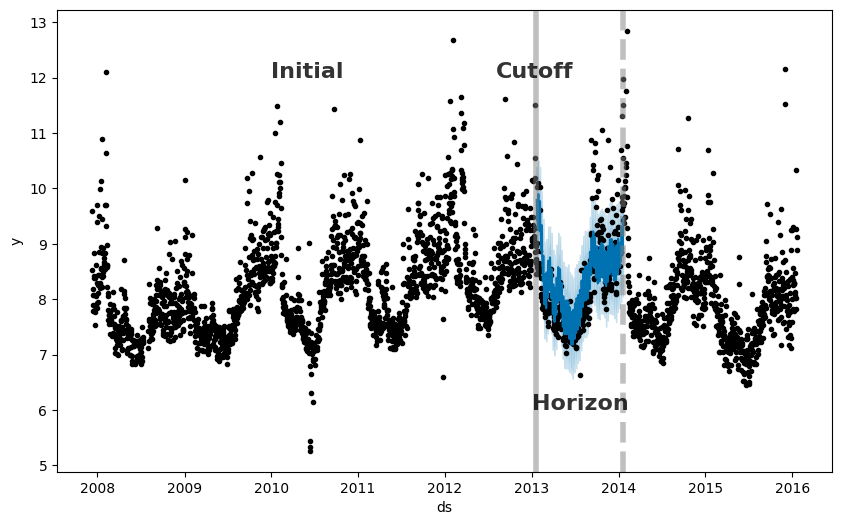

In [7]:

fig = plt.figure(facecolor='w', figsize=(10, 6))
ax = fig.add_subplot(111)
ax.plot(m.history['ds'].values, m.history['y'], 'k.')
ax.plot(df_cv['ds'].values, df_cv['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv['ds'].values, df_cv['yhat_lower'],
                df_cv['yhat_upper'], color='#0072B2',
                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')
ax.text(x=pd.to_datetime('2010-01-01'),y=12, s='Initial', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.text(x=pd.to_datetime('2012-08-01'),y=12, s='Cutoff', color='black',
       fontsize=16, fontweight='bold', alpha=0.8)
ax.axvline(x=pd.to_datetime(cutoff) + pd.Timedelta('365 days'), c='gray', lw=4,
           alpha=0.5, ls='--')
ax.text(x=pd.to_datetime('2013-01-01'),y=6, s='Horizon', color='black',
       fontsize=16, fontweight='bold', alpha=0.8);

In [8]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/11 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/nj2r00jy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/gwpnrpkm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25108', 'data', 'file=/tmp/tmp75de5jz6/nj2r00jy.json', 'init=/tmp/tmp75de5jz6/gwpnrpkm.json', 'output', 'file=/tmp/tmp75de5jz6/prophet_model1murwmk4/prophet_model-20240825090646.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:06:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:06:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/wzc0y7f3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/oen_7vgw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [9]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.954582,8.436921,9.473565,8.242493,2010-02-15
1,2010-02-17,8.720932,8.193911,9.215133,8.008033,2010-02-15
2,2010-02-18,8.604608,8.074924,9.109937,8.045268,2010-02-15
3,2010-02-19,8.526379,8.030227,9.022581,7.928766,2010-02-15
4,2010-02-20,8.268247,7.779369,8.787281,7.745003,2010-02-15


In [10]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='365 days')

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/e0mvuh07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/ouacr14g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42297', 'data', 'file=/tmp/tmp75de5jz6/e0mvuh07.json', 'init=/tmp/tmp75de5jz6/ouacr14g.json', 'output', 'file=/tmp/tmp75de5jz6/prophet_modelbpxjx24v/prophet_model-20240825090712.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/ahf86mti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/v518gfv9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [11]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.493358,0.702395,0.503977,0.058376,0.049365,0.058677,0.685473
1,38 days,0.499112,0.706478,0.508946,0.058951,0.049135,0.059312,0.682960
2,39 days,0.521344,0.722042,0.515016,0.059547,0.049225,0.060034,0.680219
3,40 days,0.528651,0.727084,0.517873,0.059852,0.049072,0.060409,0.683874
4,41 days,0.536149,0.732222,0.518843,0.059927,0.049135,0.060548,0.691412


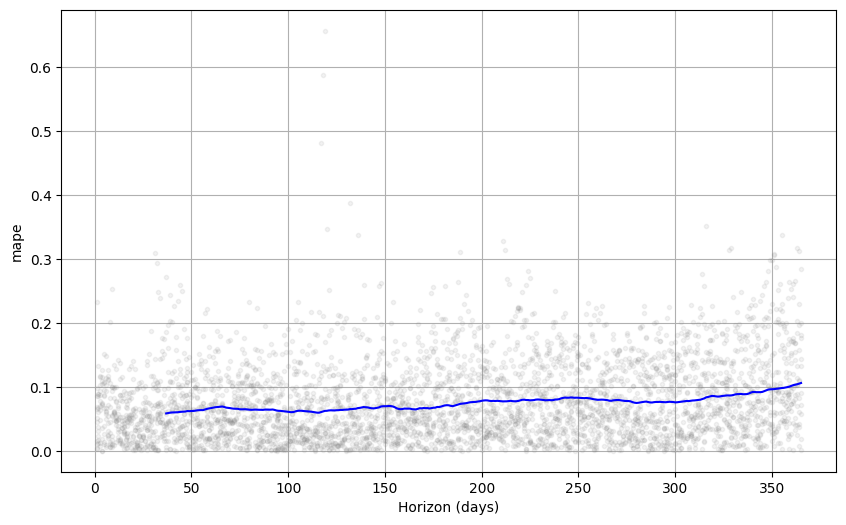

In [12]:

from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

## Hyperparameter tuning

In [13]:
import itertools
import numpy as np
import pandas as pd

param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(df)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/3musvx9x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/wbua0895.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54928', 'data', 'file=/tmp/tmp75de5jz6/3musvx9x.json', 'init=/tmp/tmp75de5jz6/wbua0895.json', 'output', 'file=/tmp/tmp75de5jz6/prophet_model0iu1abk8/prophet_model-20240825090812.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:08:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:08:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/rtvhncd9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/ya7wnjmf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp75de5jz6/exol56sz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:input tempfile:

    changepoint_prior_scale  seasonality_prior_scale      rmse
0                     0.001                     0.01  0.754586
1                     0.001                     0.10  0.752845
2                     0.001                     1.00  0.753428
3                     0.001                    10.00  0.760194
4                     0.010                     0.01  0.546393
5                     0.010                     0.10  0.539256
6                     0.010                     1.00  0.525528
7                     0.010                    10.00  0.519574
8                     0.100                     0.01  0.525245
9                     0.100                     0.10  0.519843
10                    0.100                     1.00  0.520828
11                    0.100                    10.00  0.514431
12                    0.500                     0.01  0.529450
13                    0.500                     0.10  0.527707
14                    0.500                     1.00  0